<a href="https://colab.research.google.com/github/MuhammadShifa/Anamoly-Detection-Model-ADM-in-Health-Care-Insurance-/blob/main/HealthCare_ADM_with_DL_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# To access the drive data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load the Dataset

In [ ]:
import pandas as pd

# Load the dataset to pandas dataframe
dataframe = pd.read_csv('/content/drive/My Drive/ADM Datasets/train_data.csv')
print(dataframe.shape)

# Print first 10 value of data frame
dataframe.head(10)

(558211, 27)


,Provider,PotentialFraud,InscClaimAmtReimbursed,DeductibleAmtPaid,AdmitDays,Gender,Race,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,IsDead
0,PRV51001,0,20,0.0,7.0,1,1,1,12,12,1,1,1,1,2,2,1,1,2,2,2,0,0,300,110,80.0,0.0
1,PRV51001,0,700,0.0,7.0,1,1,0,12,12,1,2,2,2,2,2,1,1,1,2,1,0,0,720,10,67.0,0.0
2,PRV51001,0,900,0.0,7.0,2,1,0,12,12,2,2,1,2,2,2,1,1,2,1,2,0,0,1380,370,76.0,0.0
3,PRV51001,0,500,0.0,7.0,1,1,0,12,12,1,1,1,1,1,1,1,1,2,2,2,2020,1068,6700,2700,74.0,0.0
4,PRV51001,0,36000,1068.0,5.0,1,1,0,12,12,2,1,1,2,2,1,1,1,2,2,1,36000,1068,3520,140,69.0,0.0
5,PRV51001,0,12000,1068.0,3.0,1,1,0,12,12,2,2,1,2,2,2,2,2,2,2,2,95000,2136,2270,900,72.0,0.0
6,PRV51001,0,70,0.0,7.0,1,1,0,12,12,1,1,2,2,2,2,2,1,1,2,2,5000,1068,370,70,91.0,0.0
7,PRV51001,0,100,0.0,7.0,2,2,0,12,12,2,1,1,2,2,2,2,2,1,2,2,0,0,320,80,90.0,0.0
8,PRV51001,0,300,0.0,7.0,2,2,1,12,12,1,1,1,2,1,2,1,1,2,2,2,0,0,630,130,57.0,0.0
9,PRV51001,0,60,0.0,7.0,2,2,1,12,12,2,1,1,2,1,1,1,1,2,2,2,0,0,1590,1070,98.0,0.0


## Cleaning the Dataset

In [ ]:
# print data information i,e no of columns and rows etc
data_info = dataframe.info()
print(data_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558211 entries, 0 to 558210
Data columns (total 27 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Provider                         558211 non-null  object 
 1   PotentialFraud                   558211 non-null  int64  
 2   InscClaimAmtReimbursed           558211 non-null  int64  
 3   DeductibleAmtPaid                558211 non-null  float64
 4   AdmitDays                        558211 non-null  float64
 5   Gender                           558211 non-null  int64  
 6   Race                             558211 non-null  int64  
 7   RenalDiseaseIndicator            558211 non-null  int64  
 8   NoOfMonths_PartACov              558211 non-null  int64  
 9   NoOfMonths_PartBCov              558211 non-null  int64  
 10  ChronicCond_Alzheimer            558211 non-null  int64  
 11  ChronicCond_Heartfailure         558211 non-null  int64  
 12  Ch

In [ ]:
# Check is there any null value
dataframe.isnull().sum()

Provider                           0
PotentialFraud                     0
InscClaimAmtReimbursed             0
DeductibleAmtPaid                  0
AdmitDays                          0
Gender                             0
Race                               0
RenalDiseaseIndicator              0
NoOfMonths_PartACov                0
NoOfMonths_PartBCov                0
ChronicCond_Alzheimer              0
ChronicCond_Heartfailure           0
ChronicCond_KidneyDisease          0
ChronicCond_Cancer                 0
ChronicCond_ObstrPulmonary         0
ChronicCond_Depression             0
ChronicCond_Diabetes               0
ChronicCond_IschemicHeart          0
ChronicCond_Osteoporasis           0
ChronicCond_rheumatoidarthritis    0
ChronicCond_stroke                 0
IPAnnualReimbursementAmt           0
IPAnnualDeductibleAmt              0
OPAnnualReimbursementAmt           0
OPAnnualDeductibleAmt              0
Age                                0
IsDead                             0
d

In [ ]:
# Checking is there any duplicate rows
print("The shape of dataframe is: ",dataframe.shape)
dataframe = dataframe.drop_duplicates(subset = None, )
print("The shape of dataframe after duplicate row: ", dataframe.shape)


The shape of dataframe is:  (558211, 27)
The shape of dataframe after duplicate row:  (534843, 27)


As we have found 23, 368 rows duplicate so we will drop this.

## Exploratory Data Analysis (EDA)

#### Dependent Variable

Exploratory data analysis was conducted started with the dependent variable, PotentialFraud in our case. There were 201403 frauds and 333440 non-frauds. 37.65% of the data were frauds while 62.34% were non-fraudulent claims. 

In [ ]:
# Count the occurence of Fraud/non-fraud 
occ = dataframe['PotentialFraud'].value_counts()
print(occ)

# Length of total row/ observation
total_rows =len(dataframe.index)
print(total_rows)

0    333440
1    201403
Name: PotentialFraud, dtype: int64
534843


In [ ]:
occ_0, occ_1 = occ
print("The occ of 0 is: ",occ_0)
print("The occ of 1 is: ",occ_1)

# Lets check the percentage of 0 and 1 in our dataset

percent_0 = (occ_0/total_rows) * 100
percent_1 = (occ_1/total_rows) * 100

print("The Percentage of 0 in dataset:",percent_0)
print("The Percentage of 1 in dataset", percent_1)


The occ of 0 is:  333440
The occ of 1 is:  201403
The Percentage of 0 in dataset: 62.34352884865279
The Percentage of 1 in dataset 37.65647115134721


In [ ]:
# For checking Imbalanced classification let's check the ratio of fraud and non-fraud
ratio_cases = occ/(len(dataframe.index))
print(f'Ratio of non-farudulent cases: {ratio_cases[0]} \nRatio of fraudulent case: {ratio_cases[1]}')

Ratio of non-farudulent cases: 0.6234352884865278 
Ratio of fraudulent case: 0.37656471151347215


The above result of fradulent and non-fraudulent ratio shows that we an consider it as a balanced classification upto some extent. As we have not a lot imabalanced classifcation

#### Data Visualization

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


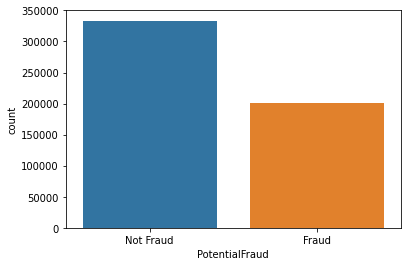

In [ ]:
# visualize the target variable i,e PotentialFraud here
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.countplot(dataframe['PotentialFraud'])
g.set_xticklabels(['Not Fraud','Fraud'])
plt.show()

In [ ]:
import numpy as np
# Convert the DataFrame into two numpy variable
def prep_data(df: pd.DataFrame) -> (np.ndarray, np.ndarray):
    X = df.iloc[:, 2:28].values
    y = df.PotentialFraud.values

    return X, y


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

# Define a function to create a scatter plot of our data and labels
def plot_data(X: np.ndarray, y: np.ndarray):
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    plt.legend()
    return plt.show()

In [ ]:
# Create X and y from the prep_data function 
X, y = prep_data(dataframe)
print(X.shape)
print(y.shape)

(534843, 25)
(534843,)


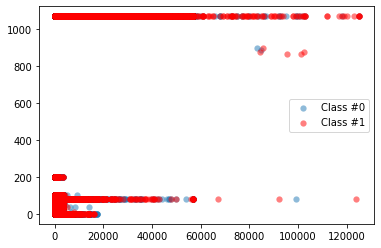

In [ ]:
# Plot our data by running our plot data function on X and y
plot_data(X, y)

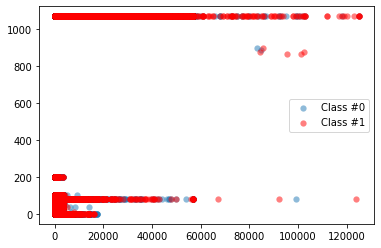

In [ ]:
plt.scatter(dataframe.InscClaimAmtReimbursed[dataframe.PotentialFraud == 0], dataframe.DeductibleAmtPaid[dataframe.PotentialFraud == 0], label="Class #0", alpha=0.5, linewidth=0.15)
plt.scatter(dataframe.InscClaimAmtReimbursed[dataframe.PotentialFraud == 1], dataframe.DeductibleAmtPaid[dataframe.PotentialFraud == 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
plt.legend()
plt.show()

In [ ]:
# Converting pandas dataframe to x and y
X = dataframe.drop(['Provider','PotentialFraud'], axis = 1).astype(float)
y = dataframe.PotentialFraud.astype(float)
print(X)
print(y)

        InscClaimAmtReimbursed  DeductibleAmtPaid  ...   Age  IsDead
0                         20.0                0.0  ...  80.0     0.0
1                        700.0                0.0  ...  67.0     0.0
2                        900.0                0.0  ...  76.0     0.0
3                        500.0                0.0  ...  74.0     0.0
4                      36000.0             1068.0  ...  69.0     0.0
...                        ...                ...  ...   ...     ...
558206                  1100.0               40.0  ...  70.0     0.0
558207                   200.0                0.0  ...  51.0     0.0
558208                    80.0                0.0  ...  46.0     0.0
558209                  3300.0                0.0  ...  58.0     0.0
558210                    40.0                0.0  ...  58.0     0.0

[558211 rows x 25 columns]
0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
558206    0.0
558207    0.0
558208    0.0
558209    0.0
5582

In [ ]:
# find the variance and correlation in the features
print(X.var())
print(X.corr())

InscClaimAmtReimbursed             1.519090e+07
DeductibleAmtPaid                  7.785084e+04
AdmitDays                          2.408837e+00
Gender                             2.438275e-01
Race                               5.155307e-01
RenalDiseaseIndicator              1.574123e-01
NoOfMonths_PartACov                8.031344e-01
NoOfMonths_PartBCov                6.252241e-01
ChronicCond_Alzheimer              2.400265e-01
ChronicCond_Heartfailure           2.423371e-01
ChronicCond_KidneyDisease          2.418730e-01
ChronicCond_Cancer                 1.279403e-01
ChronicCond_ObstrPulmonary         2.144797e-01
ChronicCond_Depression             2.454552e-01
ChronicCond_Diabetes               2.089413e-01
ChronicCond_IschemicHeart          1.839640e-01
ChronicCond_Osteoporasis           2.163934e-01
ChronicCond_rheumatoidarthritis    2.138355e-01
ChronicCond_stroke                 9.110468e-02
IPAnnualReimbursementAmt           1.398836e+08
IPAnnualDeductibleAmt              1.392

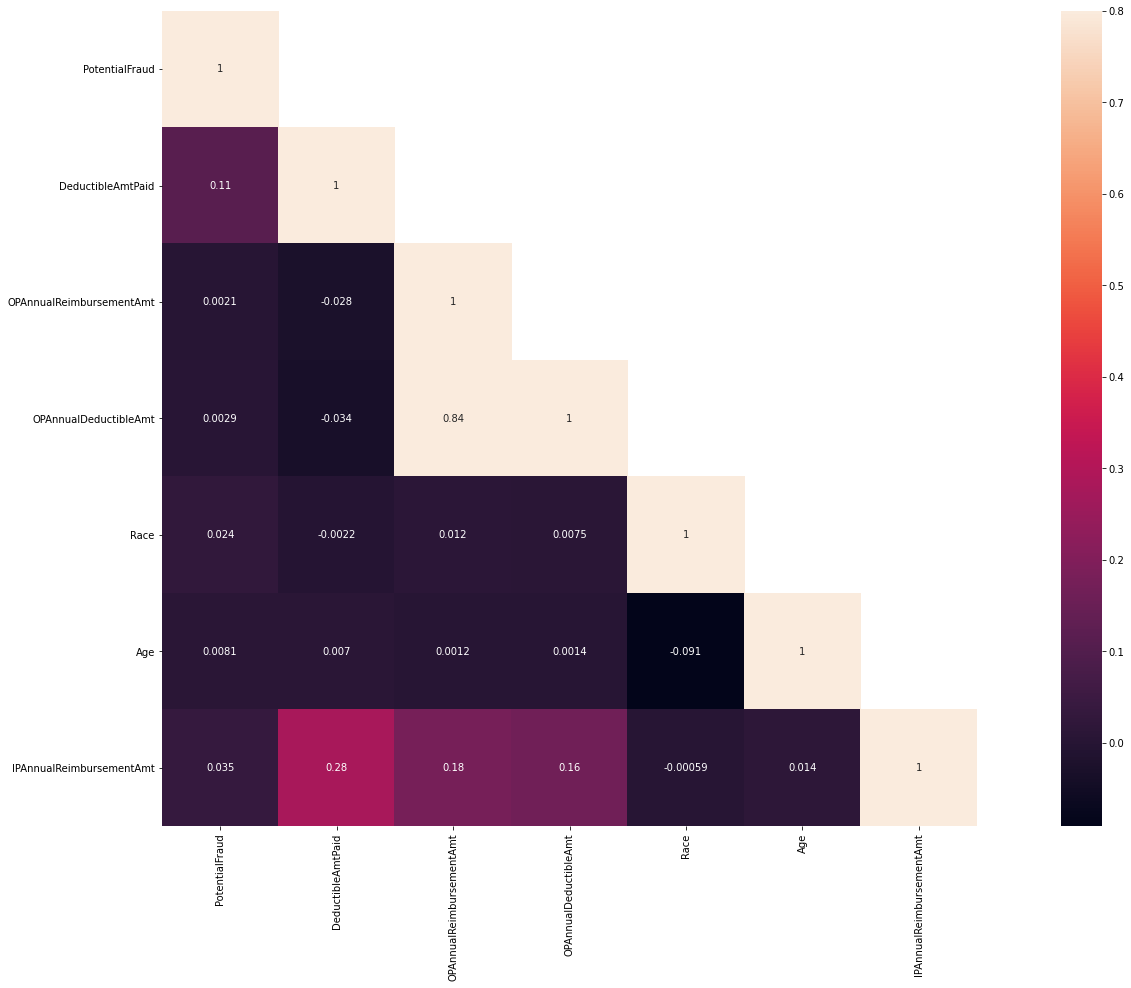

In [ ]:
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

corrMatt = dataframe[['PotentialFraud','DeductibleAmtPaid','OPAnnualReimbursementAmt','OPAnnualDeductibleAmt','Race','Age',
                    'IPAnnualReimbursementAmt']].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(30,15)
sn.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

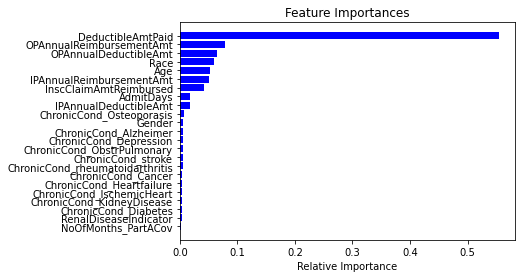

In [ ]:
# Check the relative importance of Features with RandomForestRegressor
import numpy
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=1, max_depth=10)
df=pd.get_dummies(X)
model.fit(df,y)
import numpy as np
features = X.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-23:]  
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
#Standardizing the data with StandardScaler mean = 0 and std = 1
from sklearn.preprocessing import StandardScaler
#dataset import


#Changing pandas dataframe to numpy array
X = dataframe.iloc[:,2:27].values
y = dataframe.iloc[:,1].values



sc = StandardScaler()
X = sc.fit_transform(X)
print(X)

[[-0.25985153 -0.29290773  0.01628602 ... -0.53380379  0.47878796
  -0.08700201]
 [-0.08538284 -0.29290773  0.01628602 ... -0.63418425 -0.51996429
  -0.08700201]
 [-0.03406852 -0.29290773  0.01628602 ... -0.27281461  0.17147957
  -0.08700201]
 ...
 [-0.24445723 -0.29290773  0.01628602 ... -0.14232001 -2.13333329
  -0.08700201]
 [ 0.58170333 -0.29290773  0.01628602 ... -0.4033092  -1.21140814
  -0.08700201]
 [-0.2547201  -0.29290773  0.01628602 ... -0.4033092  -1.21140814
  -0.08700201]]


In [ ]:
#Scaling the data with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler


#Changing pandas dataframe to numpy array
X = dataframe.iloc[:,2:27].values
y = dataframe.iloc[:,1:2].values


scaler = MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(X)
print(X)

[[1.60000000e-04 0.00000000e+00 1.71428571e-01 ... 7.94797688e-03
  7.20000000e-01 0.00000000e+00]
 [5.60000000e-03 0.00000000e+00 1.71428571e-01 ... 7.22543353e-04
  5.46666667e-01 0.00000000e+00]
 [7.20000000e-03 0.00000000e+00 1.71428571e-01 ... 2.67341040e-02
  6.66666667e-01 0.00000000e+00]
 ...
 [6.40000000e-04 0.00000000e+00 1.71428571e-01 ... 3.61271676e-02
  2.66666667e-01 0.00000000e+00]
 [2.64000000e-02 0.00000000e+00 1.71428571e-01 ... 1.73410405e-02
  4.26666667e-01 0.00000000e+00]
 [3.20000000e-04 0.00000000e+00 1.71428571e-01 ... 1.73410405e-02
  4.26666667e-01 0.00000000e+00]]


In [ ]:
# converting the output class to onehotencoding 'Which is the process of converting the output class to binary value
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()
y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

## Modeling or Keras-Classifier

1. Multi-Layer Perceptron (MLP)

In [ ]:
# 1. Simple MLP for classification with all features without normazlizing and standardizing
import pandas as pd
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense,BatchNormalization,Dropout


# load the dataset
dataset = pd.read_csv('/content/drive/My Drive/ADM Datasets/train_data.csv')

# Droping the Duplicate row 
dataset = dataset.drop_duplicates(subset = None,inplace= False )



#Changing pandas dataset to numpy array
X = dataset.iloc[:,2:27].values
y = dataset.iloc[:,1].values

#Spliting into train test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25)
print(X_train.shape)
print(y_train.shape)

# Neural network
model = Sequential()
model.add(Dense(36, input_dim=X_train.shape[-1], activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test),  verbose=1)


(401132, 25)
(401132,)
Epoch 1/20
12536/12536 [==============================] - 21s 2ms/step - loss: 0.6853 - accuracy: 0.6156 - val_loss: 0.6581 - val_accuracy: 0.6339
Epoch 2/20
12536/12536 [==============================] - 20s 2ms/step - loss: 0.6572 - accuracy: 0.6318 - val_loss: 0.6569 - val_accuracy: 0.6317
Epoch 3/20
12536/12536 [==============================] - 20s 2ms/step - loss: 0.6568 - accuracy: 0.6327 - val_loss: 0.6567 - val_accuracy: 0.6339
Epoch 4/20
12536/12536 [==============================] - 20s 2ms/step - loss: 0.6573 - accuracy: 0.6316 - val_loss: 0.6564 - val_accuracy: 0.6339
Epoch 5/20
12536/12536 [==============================] - 20s 2ms/step - loss: 0.6568 - accuracy: 0.6324 - val_loss: 0.6576 - val_accuracy: 0.6334
Epoch 6/20
12536/12536 [==============================] - 20s 2ms/step - loss: 0.6572 - accuracy: 0.6315 - val_loss: 0.6574 - val_accuracy: 0.6337
Epoch 7/20
12536/12536 [==============================] - 21s 2ms/step - loss: 0.6565 - accurac

In [ ]:
# Simple MLP for classification with Dimensionality Reduction by droping some features
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense


# load the dataset
dataset = pd.read_csv('/content/drive/My Drive/ADM Datasets/train_data.csv')

# Droping the Duplicate row 
dataset = dataset.drop_duplicates(subset = None,inplace= False )

# Droping some of the column from input "Dimensionality Reduction"

X_input = dataset.drop(['Provider','PotentialFraud','NoOfMonths_PartBCov','RenalDiseaseIndicator','ChronicCond_KidneyDisease',
                    'ChronicCond_Diabetes','ChronicCond_IschemicHeart','ChronicCond_Heartfailure','ChronicCond_rheumatoidarthritis',
                    'ChronicCond_Cancer','Gender','ChronicCond_ObstrPulmonary','ChronicCond_Alzheimer'], axis = 1)
y_output = dataset.PotentialFraud

#Changing pandas dataframe to numpy array
X = X_input.values
y = y_output.values

#Spliting into train test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25)
print(X_train.shape)
print(y_train.shape)

# Neural network
model = Sequential()
model.add(Dense(36, input_dim=X_train.shape[-1], activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test),  verbose=1)



(401132, 14)
(401132,)
Epoch 1/20
12536/12536 [==============================] - 20s 2ms/step - loss: 0.6741 - accuracy: 0.6185 - val_loss: 0.6573 - val_accuracy: 0.6294
Epoch 2/20
12536/12536 [==============================] - 20s 2ms/step - loss: 0.6570 - accuracy: 0.6321 - val_loss: 0.6560 - val_accuracy: 0.6344
Epoch 3/20
12536/12536 [==============================] - 20s 2ms/step - loss: 0.6567 - accuracy: 0.6323 - val_loss: 0.6582 - val_accuracy: 0.6349
Epoch 4/20
12536/12536 [==============================] - 20s 2ms/step - loss: 0.6560 - accuracy: 0.6343 - val_loss: 0.6566 - val_accuracy: 0.6309
Epoch 5/20
12536/12536 [==============================] - 20s 2ms/step - loss: 0.6572 - accuracy: 0.6314 - val_loss: 0.6567 - val_accuracy: 0.6346
Epoch 6/20
12536/12536 [==============================] - 21s 2ms/step - loss: 0.6565 - accuracy: 0.6326 - val_loss: 0.6558 - val_accuracy: 0.6349
Epoch 7/20
12536/12536 [==============================] - 20s 2ms/step - loss: 0.6572 - accurac

In [ ]:
# Simple MLP for classification with Dimensionality resduction and scaling input
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,BatchNormalization, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder


# load the dataset
dataset = pd.read_csv('/content/drive/My Drive/ADM Datasets/train_data.csv')
# Droping the Duplicate row 
dataset = dataset.drop_duplicates(subset = None,inplace= False )


# Droping some of the column from input "Dimensionality Reduction"

X_input = dataset.drop(['Provider','PotentialFraud','NoOfMonths_PartBCov','RenalDiseaseIndicator','ChronicCond_KidneyDisease',
                    'ChronicCond_Diabetes','ChronicCond_IschemicHeart','ChronicCond_Heartfailure','ChronicCond_rheumatoidarthritis',
                    'ChronicCond_Cancer','Gender','ChronicCond_ObstrPulmonary','ChronicCond_Alzheimer'], axis = 1)
y_output = dataset.PotentialFraud

#Changing pandas dataframe to numpy array
X = X_input.values
y = y_output.values
y = y.reshape(-1,1)

# Scaling the data with MinMaxScaler

scaler =MinMaxScaler(feature_range=(0,1))
scaledX = scaler.fit_transform(X)
print(scaledX)

# one hot encoding the y
ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()

#Split into train test set
X_train,X_test,y_train,y_test = train_test_split(scaledX,y,test_size = 0.25)
print(X_train.shape)
print(y_train.shape)

# Neural network
model = Sequential()
model.add(Dense(36, input_dim=X_train.shape[-1], activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(2, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test),  verbose=1)



[[1.60000000e-04 0.00000000e+00 1.71428571e-01 ... 7.94797688e-03
  7.20000000e-01 0.00000000e+00]
 [5.60000000e-03 0.00000000e+00 1.71428571e-01 ... 7.22543353e-04
  5.46666667e-01 0.00000000e+00]
 [7.20000000e-03 0.00000000e+00 1.71428571e-01 ... 2.67341040e-02
  6.66666667e-01 0.00000000e+00]
 ...
 [6.40000000e-04 0.00000000e+00 1.71428571e-01 ... 3.61271676e-02
  2.66666667e-01 0.00000000e+00]
 [2.64000000e-02 0.00000000e+00 1.71428571e-01 ... 1.73410405e-02
  4.26666667e-01 0.00000000e+00]
 [3.20000000e-04 0.00000000e+00 1.71428571e-01 ... 1.73410405e-02
  4.26666667e-01 0.00000000e+00]]
(401132, 14)
(401132, 2)
Epoch 1/20
12536/12536 [==============================] - 42s 3ms/step - loss: 0.6704 - accuracy: 0.6245 - val_loss: 0.6555 - val_accuracy: 0.6357
Epoch 2/20
12536/12536 [==============================] - 40s 3ms/step - loss: 0.6563 - accuracy: 0.6330 - val_loss: 0.6553 - val_accuracy: 0.6357
Epoch 3/20
12536/12536 [==============================] - 39s 3ms/step - loss: 0.

In [ ]:
# Simple MLP for classification with Dimensionality resduction and Standardizing input
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder


# load the dataset
dataset = pd.read_csv('/content/drive/My Drive/ADM Datasets/train_data.csv')
# Droping the Duplicate row 
dataset = dataset.drop_duplicates(subset = None,inplace= False )

# Droping some of the column from input "Dimensionality Reduction"

X_input = dataset.drop(['Provider','PotentialFraud','NoOfMonths_PartBCov','RenalDiseaseIndicator','ChronicCond_KidneyDisease',
                    'ChronicCond_Diabetes','ChronicCond_IschemicHeart','ChronicCond_Heartfailure','ChronicCond_rheumatoidarthritis',
                    'ChronicCond_Cancer','Gender','ChronicCond_ObstrPulmonary','ChronicCond_Alzheimer'], axis = 1)
y_output = dataset.PotentialFraud

#Changing pandas dataframe to numpy array
X = X_input.values
y = y_output.values
y = y.reshape(-1,1)

# Scaling the data with StandardScaler

scaler =StandardScaler()
scaledX = scaler.fit_transform(X)
print(scaledX)

# one hot encoding the y
ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()

#Split into train test set
X_train,X_test,y_train,y_test = train_test_split(scaledX,y,test_size = 0.25)
print(X_train.shape)
print(y_train.shape)

# Neural network
model = Sequential()
model.add(Dense(36, input_dim=X_train.shape[-1], activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(2, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test),  verbose=1)


[[-0.25985153 -0.29290773  0.01628602 ... -0.53380379  0.47878796
  -0.08700201]
 [-0.08538284 -0.29290773  0.01628602 ... -0.63418425 -0.51996429
  -0.08700201]
 [-0.03406852 -0.29290773  0.01628602 ... -0.27281461  0.17147957
  -0.08700201]
 ...
 [-0.24445723 -0.29290773  0.01628602 ... -0.14232001 -2.13333329
  -0.08700201]
 [ 0.58170333 -0.29290773  0.01628602 ... -0.4033092  -1.21140814
  -0.08700201]
 [-0.2547201  -0.29290773  0.01628602 ... -0.4033092  -1.21140814
  -0.08700201]]
(401132, 14)
(401132, 2)
Epoch 1/20
12536/12536 [==============================] - 39s 3ms/step - loss: 0.6750 - accuracy: 0.6220 - val_loss: 0.6545 - val_accuracy: 0.6363
Epoch 2/20
12536/12536 [==============================] - 39s 3ms/step - loss: 0.6571 - accuracy: 0.6322 - val_loss: 0.6547 - val_accuracy: 0.6363
Epoch 3/20
12536/12536 [==============================] - 39s 3ms/step - loss: 0.6559 - accuracy: 0.6336 - val_loss: 0.6548 - val_accuracy: 0.6363
Epoch 4/20
12536/12536 [==================

In [ ]:
# MLP for training dataset with grid search via sklearn
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import numpy

# Function to create model, required for KerasClassifier
def create_model(optimizer='rmsprop'):
	# create model
  model = Sequential()
  model.add(Dense(36, input_dim=X_train.shape[-1], activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.25))
  model.add(Dense(2, activation='sigmoid'))
	# Compile model
  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  return model



# load the dataset
dataset = ppd.read_csv('/content/drive/My Drive/ADM Datasets/train_data.csv')
# Droping the Duplicate row 
dataset = dataset.drop_duplicates(subset = None,inplace= False )

# Taking a small dataset
dataset = dataset.sample(frac = .05)

# Droping some of the column from input "Dimensionality Reduction"
X_input = dataset.drop(['Provider','PotentialFraud','NoOfMonths_PartBCov','RenalDiseaseIndicator','ChronicCond_KidneyDisease',
                    'ChronicCond_Diabetes','ChronicCond_IschemicHeart','ChronicCond_Heartfailure','ChronicCond_rheumatoidarthritis',
                    'ChronicCond_Cancer','Gender','ChronicCond_ObstrPulmonary','ChronicCond_Alzheimer'], axis = 1)
y_output = dataset.PotentialFraud

#Changing pandas dataframe to numpy array
X = X_input.values
y = y_output.values
y = y.reshape(-1,1)

# Scaling the data with StandardScaler

scaler =StandardScaler()
scaledX = scaler.fit_transform(X)
print(scaledX)

# one hot encoding the y
ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()

#Split into train test set
X_train,X_test,y_train,y_test = train_test_split(scaledX,y,test_size = 0.25)
print(X_test.shape)
print(y_test.shape)

# create model
model = KerasClassifier(build_fn=create_model, verbose=0)
# grid search epochs, batch size and optimizer
optimizers = ['rmsprop', 'adam']
epochs = [30, 40]
batches = [32,64]
param_grid = dict(optimizer=optimizers, epochs=epochs, batch_size=batches)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X_train, y_train, validation_data=(X_test, y_test),  verbose=0)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

[[-0.24796501 -0.29465989  0.013799   ... -0.53832527  0.63147466
  -0.08300795]
 [ 0.03677989 -0.29465989  0.013799   ... -0.24140889  1.6317783
  -0.08300795]
 [-0.23323683 -0.29465989  0.013799   ...  0.25003891 -0.13798968
  -0.08300795]
 ...
 [-0.24060092 -0.29465989  0.013799   ... -0.00592349  1.55483186
  -0.08300795]
 [-0.18414288 -0.29465989  0.013799   ... -0.2106934  -0.06104325
  -0.08300795]
 [-0.23323683 -0.29465989  0.013799   ... -0.04687747  0.01590318
  -0.08300795]]
(6686, 14)
(6686, 2)
Best: 0.640756 using {'batch_size': 64, 'epochs': 40, 'optimizer': 'adam'}
0.640706 (0.004110) with: {'batch_size': 32, 'epochs': 30, 'optimizer': 'rmsprop'}
0.640207 (0.004012) with: {'batch_size': 32, 'epochs': 30, 'optimizer': 'adam'}
0.640307 (0.003567) with: {'batch_size': 32, 'epochs': 40, 'optimizer': 'rmsprop'}
0.640407 (0.004308) with: {'batch_size': 32, 'epochs': 40, 'optimizer': 'adam'}
0.640357 (0.003818) with: {'batch_size': 64, 'epochs': 30, 'optimizer': 'rmsprop'}
0.63

2. Convolutional Nerural Network CNN

In [ ]:
# Training CNN with Standard Scaler with dimesnsionality reduction

from keras.models import Sequential
from keras.layers import Dense, Conv1D
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing  import StandardScaler
from keras.layers import BatchNormalization, Dropout, Flatten
from keras.optimizers import Adam
import numpy


# load the dataset
dataset = pd.read_csv('/content/drive/My Drive/ADM Datasets/train_data.csv')
# Droping the Duplicate row 
dataset = dataset.drop_duplicates(subset = None,inplace= False )

# Droping some of the column from input "Dimensionality Reduction"

X_input = dataset.drop(['Provider','PotentialFraud','NoOfMonths_PartBCov','RenalDiseaseIndicator','ChronicCond_KidneyDisease',
                    'ChronicCond_Diabetes','ChronicCond_IschemicHeart','ChronicCond_Heartfailure','ChronicCond_rheumatoidarthritis',
                    'ChronicCond_Cancer','Gender','ChronicCond_ObstrPulmonary','ChronicCond_Alzheimer'], axis = 1)
y_output = dataset.PotentialFraud

#Changing pandas dataframe to numpy array
X = X_input.values
y = y_output.values
y = y.reshape(-1,1)

# Scaling the data with StandardScaler

scaler =StandardScaler()
scaledX = scaler.fit_transform(X)
print(scaledX)

# one hot encoding the y
ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()


X_train, X_test, y_train, y_test = train_test_split(scaledX, y, test_size = 0.2, random_state = 0)
print(X_train.shape, X_test.shape)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

X_train.shape, X_test.shape


epochs = 20
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2, activation='sigmoid'))

model.summary()
model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)



[[-0.25985153 -0.29290773  0.01628602 ... -0.53380379  0.47878796
  -0.08700201]
 [-0.08538284 -0.29290773  0.01628602 ... -0.63418425 -0.51996429
  -0.08700201]
 [-0.03406852 -0.29290773  0.01628602 ... -0.27281461  0.17147957
  -0.08700201]
 ...
 [-0.24445723 -0.29290773  0.01628602 ... -0.14232001 -2.13333329
  -0.08700201]
 [ 0.58170333 -0.29290773  0.01628602 ... -0.4033092  -1.21140814
  -0.08700201]
 [-0.2547201  -0.29290773  0.01628602 ... -0.4033092  -1.21140814
  -0.08700201]]
(427874, 14) (106969, 14)
Model: "sequential_113"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 13, 32)            96        
_________________________________________________________________
batch_normalization_112 (Bat (None, 13, 32)            128       
_________________________________________________________________
dropout_112 (Dropout)        (None, 13, 32)            0      

In [ ]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

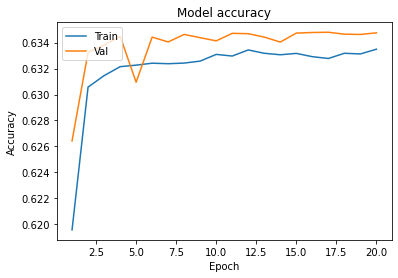

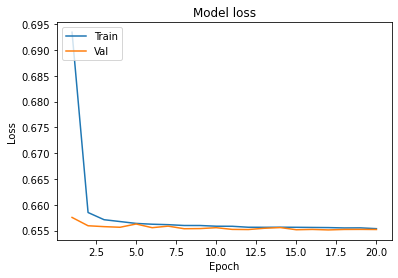

In [ ]:
import matplotlib.pyplot as plt

plot_learningCurve(history, epochs)

In [ ]:
# Training CNN with MinMax Scaler with dimesnsionality reduction

from keras.models import Sequential
from keras.layers import Dense, Conv1D
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing  import MinMaxScaler
from keras.layers import BatchNormalization, Dropout, Flatten
from keras.optimizers import Adam
import numpy


# load the dataset
dataset = pd.read_csv('/content/drive/My Drive/ADM Datasets/train_data.csv')

# Droping the Duplicate row 
dataset = dataset.drop_duplicates(subset = None,inplace= False )

# Droping some of the column from input "Dimensionality Reduction"
X_input = dataset.drop(['Provider','PotentialFraud','NoOfMonths_PartBCov','RenalDiseaseIndicator','ChronicCond_KidneyDisease',
                    'ChronicCond_Diabetes','ChronicCond_IschemicHeart','ChronicCond_Heartfailure','ChronicCond_rheumatoidarthritis',
                    'ChronicCond_Cancer','Gender','ChronicCond_ObstrPulmonary','ChronicCond_Alzheimer'], axis = 1)
y_output = dataset.PotentialFraud

#Changing pandas dataframe to numpy array
X = X_input.values
y = y_output.values
y = y.reshape(-1,1)

# Scaling the data with MinMaxScaler

scaler =MinMaxScaler()
scaledX = scaler.fit_transform(X)
print(scaledX)

# one hot encoding the y
ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()


X_train, X_test, y_train, y_test = train_test_split(scaledX, y, test_size = 0.2, random_state = 0)
print(X_train.shape, X_test.shape)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

X_train.shape, X_test.shape


epochs = 20
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2, activation='sigmoid'))

model.summary()
model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)



[[1.60000000e-04 0.00000000e+00 1.71428571e-01 ... 7.94797688e-03
  7.20000000e-01 0.00000000e+00]
 [5.60000000e-03 0.00000000e+00 1.71428571e-01 ... 7.22543353e-04
  5.46666667e-01 0.00000000e+00]
 [7.20000000e-03 0.00000000e+00 1.71428571e-01 ... 2.67341040e-02
  6.66666667e-01 0.00000000e+00]
 ...
 [6.40000000e-04 0.00000000e+00 1.71428571e-01 ... 3.61271676e-02
  2.66666667e-01 0.00000000e+00]
 [2.64000000e-02 0.00000000e+00 1.71428571e-01 ... 1.73410405e-02
  4.26666667e-01 0.00000000e+00]
 [3.20000000e-04 0.00000000e+00 1.71428571e-01 ... 1.73410405e-02
  4.26666667e-01 0.00000000e+00]]
(427874, 14) (106969, 14)
Model: "sequential_114"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 13, 32)            96        
_________________________________________________________________
batch_normalization_114 (Bat (None, 13, 32)            128       
____________________

In [ ]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

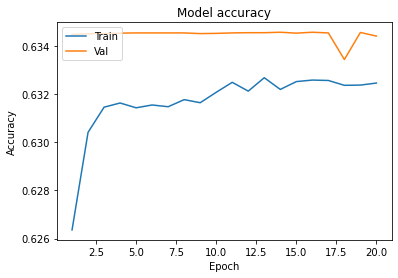

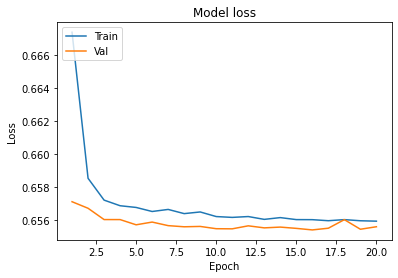

In [ ]:
import matplotlib.pyplot as plt

plot_learningCurve(history, epochs)

## Keras Classifier with model saving and Prediction

#### Prepcocessing and model training

In [ ]:
# Simple MLP for classification with Prediction and Model
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# load the dataset for training 
train_dataset = pd.read_csv('/content/drive/My Drive/ADM Datasets/train_data.csv')

# Droping the Duplicate row 
train_dataset = train_dataset.drop_duplicates(subset = None,inplace= False )

#Changing pandas dataframe into input and output numpy array
input = train_dataset.iloc[:,2:28].values.astype('float32')
output = train_dataset.iloc[:,1:2].values.astype('float32')

# Scaled the input with MinMaxScaler
input_scaler = MinMaxScaler(feature_range=(0, 1))
scaled_input = input_scaler.fit_transform(input)

# one hot encoding the output of training dataset
output_encoder = OneHotEncoder()
encoded_output = output_encoder.fit_transform(output).toarray()

print(scaled_input.shape)
print(encoded_output.shape)

input_dim = scaled_input.shape[-1]
print(input_dim)

#Split into train test set
X_train,X_test,y_train,y_test = train_test_split(scaled_input, encoded_output, test_size = 0.25)


# Neural network
model = Sequential()
model.add(Dense(36, input_dim=X_train.shape[-1], activation='relu'))
model.add(Dense(18, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(2, activation='softmax'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('/content/drive/My Drive/ADM Datasets/mlp_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32, verbose=2, callbacks = [es,mc])

(534843, 25)
(534843, 2)
25
Epoch 1/20
12536/12536 - 35s - loss: 0.6598 - accuracy: 0.6299 - val_loss: 0.6554 - val_accuracy: 0.6355

Epoch 00001: val_loss improved from inf to 0.65544, saving model to /content/drive/My Drive/ADM Datasets/mlp_model.h5
Epoch 2/20
12536/12536 - 33s - loss: 0.6565 - accuracy: 0.6332 - val_loss: 0.6552 - val_accuracy: 0.6355

Epoch 00002: val_loss improved from 0.65544 to 0.65518, saving model to /content/drive/My Drive/ADM Datasets/mlp_model.h5
Epoch 3/20
12536/12536 - 33s - loss: 0.6565 - accuracy: 0.6333 - val_loss: 0.6550 - val_accuracy: 0.6355

Epoch 00003: val_loss improved from 0.65518 to 0.65502, saving model to /content/drive/My Drive/ADM Datasets/mlp_model.h5
Epoch 4/20
12536/12536 - 33s - loss: 0.6563 - accuracy: 0.6333 - val_loss: 0.6553 - val_accuracy: 0.6355

Epoch 00004: val_loss did not improve from 0.65502
Epoch 5/20
12536/12536 - 33s - loss: 0.6563 - accuracy: 0.6333 - val_loss: 0.6550 - val_accuracy: 0.6355

Epoch 00005: val_loss improve

#### Model Evaluation

In [ ]:
loss_train, acc_train = model.evaluate(X_train, y_train, verbose = 0)
loss_val, acc_val = model.evaluate(X_test, y_test, verbose = 0)
print("The train loss is: {0} and the train accuracy is: {1}".format(loss_train, acc_train))
print("The validation loss is: {0} and the validation accuracy is: {1}".format(loss_val, acc_val))

The train loss is: 0.6547264456748962 and the train accuracy is: 0.6347711086273193
The validation loss is: 0.654743492603302 and the validation accuracy is: 0.6354600787162781


#### Accuracy, Precision, Recall, F1 Score, roc auc Curve and confusion marix

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

# predict probabilities for test set
yhat_probs = model.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = model.predict_classes(X_test, verbose=0)

print(yhat_probs) # 2-D
print(yhat_classes) # 1-D

# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
y_test_1D = output_encoder.inverse_transform(y_test) # Need to be in 1D

print(yhat_probs)
print(yhat_classes)
print()


# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test_1D, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test_1D, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test_1D, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test_1D, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test_1D, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test_1D, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test_1D, yhat_classes)
print(matrix)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[[0.7558467  0.24415329]
 [0.40021473 0.5997853 ]
 [0.6733066  0.3266934 ]
 ...
 [0.6424555  0.35754448]
 [0.42232147 0.5776785 ]
 [0.7502461  0.24975388]]
[0 1 0 ... 0 1 0]
[0.7558467  0.40021473 0.6733066  ... 0.6424555  0.42232147 0.7502461 ]
[0 1 0 ... 0 1 0]

Accuracy: 0.635460
Precision: 0.576935
Recall: 0.112882
F1 score: 0.188820
Cohens kappa: 0.075040
ROC AUC: 0.450578
[[79295  4160]
 [44583  5673]]


#### Visualization of Loss and Accuracy 

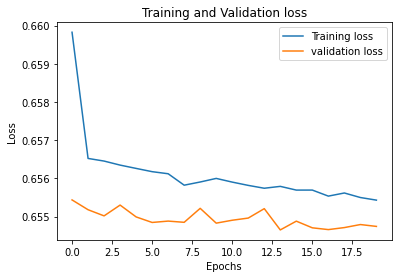

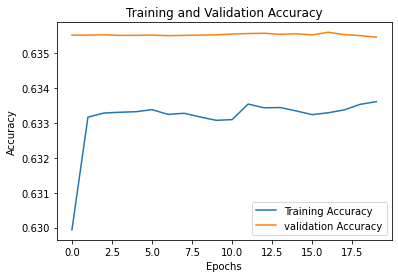

In [ ]:
import matplotlib.pyplot as plt

# plot loss during training

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plot Accuracy during training
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Making Prediction on Saved Model

#### Load the Saved Classifier or Model

In [ ]:
from keras.models import load_model
#Load the saved Model and do prediction

classifier = load_model('/content/drive/My Drive/ADM Datasets/mlp_model.h5')


#### Prediction on test.csv

In [ ]:
# Now make prediction on saved Model for test dataset
# load the dataset for testing the model

pred_dataset = pd.read_csv('/content/drive/My Drive/ADM Datasets/test_data.csv')

#Changing pandas dataframe to numpy array
pred_input = pred_dataset.iloc[:,2:28].values.astype('float32')
pred_output = pred_dataset.iloc[:,1:2].values.astype('float32')

# Scaled the input and output for prediction
pred_input_scaled = input_scaler.fit_transform(pred_input)
pred_output_endcoded = output_encoder.fit_transform(pred_output).toarray()

# evaluate the loss and accuracy for the prediction dataset
pred_loss, pred_acc = classifier.evaluate(pred_input_scaled, pred_output_endcoded, verbose =0)
print("The Predicted dataset loss is: {0} and Accuracy is: {1}".format(pred_loss, pred_acc))



The Predicted dataset loss is: 0.657598614692688 and Accuracy is: 0.6299875974655151


In [ ]:
# Prediction on input data

prediction = classifier.predict(pred_input_scaled)
inv_predict = output_encoder.inverse_transform(prediction).astype('int64')
inv_actual = output_encoder.inverse_transform(pred_output_endcoded).astype('int64')
for j in range(0,len(pred_output)):
        print("Pred={0} Act={1}\n".format(inv_predict[j], inv_actual[j]))

Streaming output truncated to the last 5000 lines.
Pred=[0] Act=[1]

Pred=[0] Act=[1]

Pred=[0] Act=[1]

Pred=[0] Act=[1]

Pred=[0] Act=[1]

Pred=[0] Act=[1]

Pred=[0] Act=[1]

Pred=[0] Act=[1]

Pred=[0] Act=[1]

Pred=[0] Act=[1]

Pred=[1] Act=[1]

Pred=[0] Act=[1]

Pred=[0] Act=[1]

Pred=[0] Act=[1]

Pred=[0] Act=[1]

Pred=[0] Act=[1]

Pred=[0] Act=[1]

Pred=[0] Act=[1]

Pred=[0] Act=[1]

Pred=[0] Act=[1]

Pred=[0] Act=[1]

Pred=[1] Act=[1]

Pred=[0] Act=[1]

Pred=[0] Act=[1]

Pred=[0] Act=[1]

Pred=[0] Act=[1]

Pred=[0] Act=[1]

Pred=[0] Act=[1]

Pred=[0] Act=[1]

Pred=[0] Act=[1]

Pred=[0] Act=[1]

Pred=[0] Act=[1]

Pred=[0] Act=[1]

Pred=[0] Act=[1]

Pred=[1] Act=[1]

Pred=[0] Act=[1]

Pred=[0] Act=[1]

Pred=[0] Act=[1]

Pred=[0] Act=[1]

Pred=[0] Act=[1]

Pred=[0] Act=[1]

Pred=[0] Act=[1]

Pred=[0] Act=[1]

Pred=[0] Act=[1]

Pred=[0] Act=[1]

Pred=[0] Act=[1]

Pred=[1] Act=[1]

Pred=[0] Act=[1]

Pred=[0] Act=[1]

Pred=[0] Act=[1]

Pred=[0] Act=[1]

Pred=[0] Act=[1]

Pred=[0] Act=